In [1]:
import torch
from torch import nn
import torch.nn.functional as F
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

In [2]:
def seed_all(seed=42):
    np.random.seed(seed)
    torch.random.manual_seed(seed)

In [3]:
seed_all()

In [4]:
def make_regression_outputs_and_targets(n_samples, out_min=20, out_max=200, noise_loc=0, noise_scale=5):
    outputs = torch.tensor(np.random.uniform(20, 100, n_samples))
    noise = torch.tensor(np.random.normal(noise_loc, noise_scale, n_samples))
    targets = outputs + noise
    return outputs, targets

In [5]:
outputs, targets = make_regression_outputs_and_targets(20)

In [6]:
outputs

tensor([49.9632, 96.0571, 78.5595, 67.8927, 32.4815, 32.4796, 24.6467, 89.2941,
        68.0892, 76.6458, 21.6468, 97.5928, 86.5954, 36.9871, 34.5460, 34.6724,
        44.3394, 61.9805, 54.5556, 43.2983], dtype=torch.float64)

In [7]:
targets

tensor([44.8991, 97.6284, 74.0194, 60.8312, 39.8097, 31.3507, 24.9843, 82.1704,
        65.3673, 77.2004, 15.8918, 99.4713, 83.5922, 35.5287, 31.5375, 43.9338,
        44.2719, 56.6920, 58.6683, 37.1941], dtype=torch.float64)

In [8]:
error = targets - outputs
error

tensor([-5.0642,  1.5712, -4.5401, -7.0615,  7.3282, -1.1289,  0.3376, -7.1237,
        -2.7219,  0.5546, -5.7550,  1.8785, -3.0032, -1.4585, -3.0085,  9.2614,
        -0.0675, -5.2886,  4.1127, -6.1042], dtype=torch.float64)

In [9]:
squared_error = error.square()
squared_error

tensor([2.5646e+01, 2.4688e+00, 2.0613e+01, 4.9865e+01, 5.3703e+01, 1.2744e+00,
        1.1400e-01, 5.0748e+01, 7.4088e+00, 3.0760e-01, 3.3120e+01, 3.5287e+00,
        9.0192e+00, 2.1271e+00, 9.0513e+00, 8.5773e+01, 4.5544e-03, 2.7969e+01,
        1.6915e+01, 3.7261e+01], dtype=torch.float64)

In [10]:
mean_squared_error = squared_error.mean()
mean_squared_error

tensor(21.8458, dtype=torch.float64)

In [11]:
def mse(yhat, y):
    return (y - yhat).square().mean()

In [12]:
mse(outputs, targets)

tensor(21.8458, dtype=torch.float64)

In [13]:
mse = nn.MSELoss()

In [14]:
mse(outputs, targets)

tensor(21.8458, dtype=torch.float64)

In [15]:
F.mse_loss(outputs, targets)

tensor(21.8458, dtype=torch.float64)

In [16]:
errors = torch.linspace(-10, 10, 50)
squared_erros = errors.square()

Text(0, 0.5, 'Squared Error')

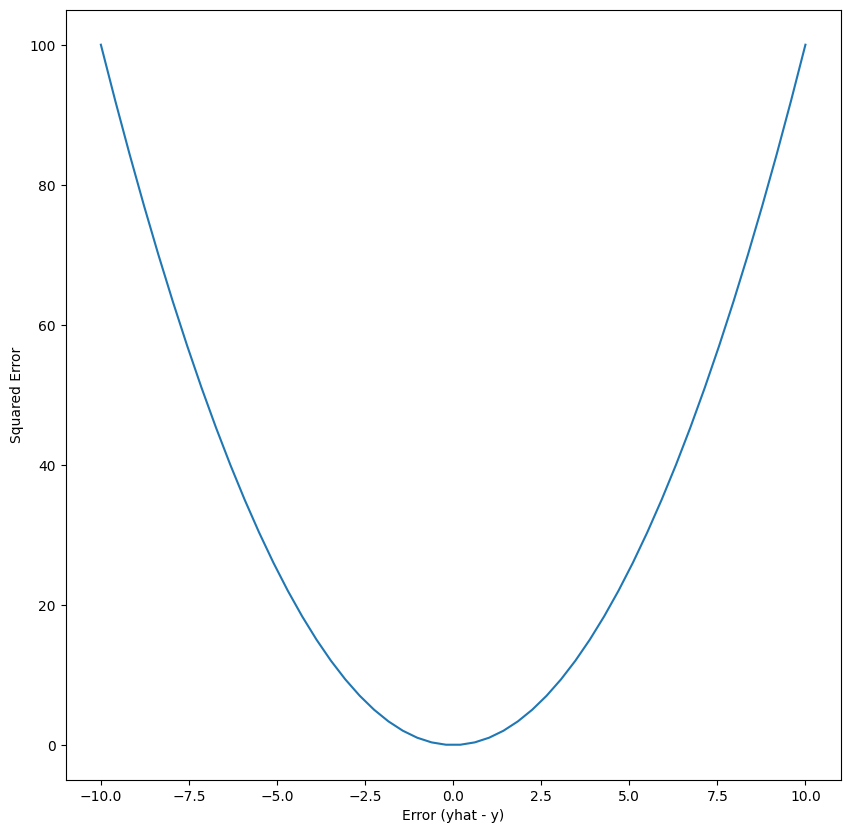

In [17]:
mse_fig, ax = plt.subplots(figsize=(10,10))
ax.plot(errors, squared_erros)
ax.set_xlabel("Error (yhat - y)")
ax.set_ylabel("Squared Error")

In [18]:
# Check our work
-np.log(0.7)

0.35667494393873245

In [19]:
# Define a cross entropy function
def H(p, q):
    return (-1 * q * p.log()).sum()

In [20]:
# Test it on our example
H(torch.tensor([0.1, 0.7, 0.2]), torch.tensor([0, 1, 0]))

tensor(0.3567)

In [21]:
t = torch.tensor([0.1, 0.7, 0.2])

In [22]:
def our_cross_entropy(yhat, y):
    act = yhat[y]
    return -act.log()

In [23]:
our_cross_entropy(t, 1)

tensor(0.3567)

In [24]:
def avg_cross_entropy(yhat, y):
    return -yhat[range(y.shape[0]),y].log().mean()

In [25]:
t = torch.randn(3, 3)
t

tensor([[ 0.3367,  0.1288,  0.2345],
        [ 0.2303, -1.1229, -0.1863],
        [ 2.2082, -0.6380,  0.4617]])

In [26]:
y = torch.randint(low=0, high=3, size=(3,))
y

tensor([1, 2, 1])

In [27]:
avg_cross_entropy(t.softmax(dim=-1), y) # (logits, targets)

tensor(1.7766)

In [28]:
nn.CrossEntropyLoss()(t, y), F.cross_entropy(t, y)

(tensor(1.7766), tensor(1.7766))

In [29]:
a = 0.00000000000000000000000000001
a * a

9.999999999999998e-59

In [30]:
a = 100000000000000000000000000000.
a * a

9.999999999999998e+57

In [31]:
def make_classification_logits(n_classes, n_samples, pct_correct, confidence=1):
    """
    This function returns simulated logits and classes.
    
    n_classes: nuber of classes
    n_samples: number of rows
    pct_correct: float between 0 and 1. The higher it is, 
                 the higher the % of logits that will 
                 generate the correct output.
    confidence: controls how confident our logits are.
                Closer to 0: less confident
                Larger: more confident
    """
    classes = list(range(n_classes))
    # Randomly make logits
    logits = np.random.uniform(-5., 5., (n_samples, n_classes))
    # Randomly make labels
    labels = np.random.choice(classes, size=(n_samples))
    # Find the max of each row in logits
    maxs = np.abs(logits).max(axis=1)
    # For each row...
    for i in range(len(maxs)):
        # If we want the answer to be right...
        if np.random.random() <= pct_correct:
            # Make the correct item the highest logit
            logits[i, labels[i]] = maxs[i] + np.random.random()*confidence
        # If we want it to be wrong...
        else:
            # Make the highest logit a different index
            _c = classes.copy()
            _c.remove(classes[labels[i]])
            _i = np.random.choice(_c)
            logits[i, _i] = maxs[i] + np.random.random()/10        
    
    # Return logits and labels
    return torch.FloatTensor(logits), torch.tensor(labels)

In [32]:
# Create some logits and associated labels.
# There will be some error here!
logits, labels = make_classification_logits(3, 10, 0.8, confidence=1)
logits

tensor([[ 2.2537,  0.2007,  0.4671],
        [-3.1515,  4.6958,  5.3618],
        [ 4.6697,  3.9483,  0.9790],
        [ 4.2187,  4.6017, -3.0402],
        [ 4.6238, -1.7467, -1.1132],
        [-2.2865,  4.0583, -1.4325],
        [ 4.1135,  0.4270, -3.5908],
        [ 3.0220, -4.2545,  4.8943],
        [ 4.9762, -3.0128, -4.9448],
        [ 3.1546,  3.4690,  2.2901]])

In [33]:
# What are the normalized predicted probabilities for each class?
logits.softmax(dim=1)

tensor([[7.7168e-01, 9.9042e-02, 1.2928e-01],
        [1.3263e-04, 3.3937e-01, 6.6050e-01],
        [6.6181e-01, 3.2167e-01, 1.6515e-02],
        [4.0531e-01, 5.9441e-01, 2.8528e-04],
        [9.9509e-01, 1.7029e-03, 3.2085e-03],
        [1.7455e-03, 9.9415e-01, 4.1004e-03],
        [9.7512e-01, 2.4435e-02, 4.3969e-04],
        [1.3326e-01, 9.2167e-05, 8.6665e-01],
        [9.9961e-01, 3.3902e-04, 4.9114e-05],
        [3.5834e-01, 4.9071e-01, 1.5095e-01]])

In [34]:
# What are the indices (classes) of the highest predicted probas?
logits.softmax(dim=1).argmax(dim=1)

tensor([0, 2, 0, 1, 0, 1, 0, 2, 0, 1])

In [35]:
# How well do they match with our labels?
labels

tensor([0, 2, 0, 1, 2, 1, 0, 2, 0, 1], dtype=torch.int32)

In [36]:
cross_entropy = nn.CrossEntropyLoss()

In [38]:
cross_entropy(logits, labels.long())


tensor(0.8235)

In [40]:
F.cross_entropy(logits, labels.long())

tensor(0.8235)

In [41]:
torch.mean(
    torch.tensor(
        [our_cross_entropy(lo, la) 
         for lo, la # softmax of logits, labels
         in zip(logits.softmax(dim=1), labels)
        ]
    )
)

tensor(0.8235)

In [42]:
logits, labels = make_classification_logits(2, 10, 1., confidence=1)
logits

tensor([[ 4.5864,  4.0757],
        [ 2.7292, -0.8962],
        [ 3.0496, -2.7120],
        [ 4.5534, -2.1025],
        [-3.3878,  5.0000],
        [ 4.0530,  1.3340],
        [ 3.7146,  3.9664],
        [ 4.2265,  3.9256],
        [ 3.1113,  3.0744],
        [ 4.4636, -1.8200]])

In [43]:
logits.softmax(dim=1)

tensor([[6.2498e-01, 3.7502e-01],
        [9.7405e-01, 2.5948e-02],
        [9.9686e-01, 3.1360e-03],
        [9.9872e-01, 1.2848e-03],
        [2.2758e-04, 9.9977e-01],
        [9.3814e-01, 6.1864e-02],
        [4.3738e-01, 5.6262e-01],
        [5.7466e-01, 4.2534e-01],
        [5.0922e-01, 4.9078e-01],
        [9.9814e-01, 1.8633e-03]])

In [44]:
labels

tensor([0, 0, 0, 0, 1, 0, 1, 0, 0, 0], dtype=torch.int32)

In [46]:
F.cross_entropy(logits, labels.long())

tensor(0.2371)

In [47]:
# Make some logits and labels, making sure not to get everything correct
logits = torch.tensor([2.8, -1.4, 1.1, -.8])
labels = torch.tensor([1., 0., 0., 0.])

In [48]:
# View the logits
logits

tensor([ 2.8000, -1.4000,  1.1000, -0.8000])

In [49]:
# Normalize to probabilities
logits.sigmoid()

tensor([0.9427, 0.1978, 0.7503, 0.3100])

In [50]:
# Calculate the loss with the logits
F.binary_cross_entropy_with_logits(logits, labels)

tensor(0.5095)

In [51]:
# Calculate the loss with the logits
nn.BCEWithLogitsLoss()(logits, labels)

tensor(0.5095)

In [52]:
F.binary_cross_entropy(logits.sigmoid(), labels)

tensor(0.5095)

In [53]:
nn.BCELoss()(logits.sigmoid(), labels)

tensor(0.5095)

In [54]:
# Values are close...
torch.allclose(F.binary_cross_entropy_with_logits(logits, labels), F.binary_cross_entropy(logits.sigmoid(), labels))

True

In [55]:
# ... but not the same
F.binary_cross_entropy_with_logits(logits, labels) == F.binary_cross_entropy(logits.sigmoid(), labels)

tensor(False)

In [56]:
F.binary_cross_entropy_with_logits(logits, labels) - F.binary_cross_entropy(logits.sigmoid(), labels)

tensor(-5.9605e-08)

In [57]:
# Column 0 may be the p(happy) = 1 - p(sad), 
# and column 2 may be p(lakers) = 1 - p(not lakers)
logits = torch.randn(10, 2) * 2
logits

tensor([[ 3.3612,  0.7117],
        [-1.3732, -0.9867],
        [-1.6909,  2.6246],
        [ 1.3743, -2.1784],
        [-0.7106, -1.8276],
        [-1.3163,  0.1560],
        [ 4.5334,  2.3579],
        [-0.8689, -2.7727],
        [-2.5724, -2.8065],
        [ 0.0720, -0.1270]])

In [58]:
labels = torch.randint(0, 2, (10, 2)).float()
labels

tensor([[0., 0.],
        [0., 0.],
        [0., 0.],
        [1., 1.],
        [0., 1.],
        [1., 1.],
        [1., 0.],
        [1., 0.],
        [1., 1.],
        [1., 0.]])

In [59]:
logits.sigmoid()

tensor([[0.9665, 0.6708],
        [0.2021, 0.2716],
        [0.1557, 0.9324],
        [0.7981, 0.1017],
        [0.3295, 0.1385],
        [0.2114, 0.5389],
        [0.9894, 0.9136],
        [0.2955, 0.0588],
        [0.0709, 0.0570],
        [0.5180, 0.4683]])

In [60]:
bce = nn.BCEWithLogitsLoss()

In [61]:
bce(logits, labels)

tensor(1.2756)

In [62]:
bce(logits[:,0], labels[:,0])

tensor(1.0503)

In [63]:
bce(logits[:,1], labels[:,1])

tensor(1.5009)

In [64]:
(bce(logits[:,0], labels[:,0]) + bce(logits[:,1], labels[:,1])) / 2

tensor(1.2756)